Goals of Notebook: Experimenting with a neural network regression model using Keras and Tensorflow

In [1]:
%run Preprocessing.ipynb

Automatically created module for IPython interactive environment


In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [3]:
X_train, y_train, X_test, y_test = preprocess()

/home/cfu288/anaconda3/envs/rdkit-env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
def baseline_model():
    model = Sequential()
    model.add(Dense(200, input_dim=4096, kernel_initializer='normal' ,activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam',  metrics=['mse','mae'])
    return model

In [5]:
seed = 10
np.random.seed(seed)
model = baseline_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  verbose=0, validation_split=0.2)

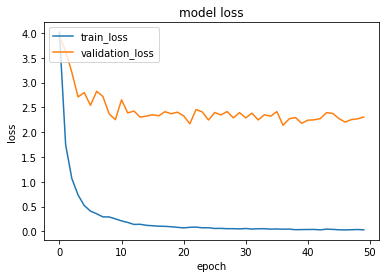

validation mse: 2.3053202813501517
mse: 0.03237742868820167


In [6]:
# print(history.history.keys())
# Loss == mse
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss','mean_squared_error'], loc='upper left')
plt.show()
print("validation mse: {}".format(history.history['val_mean_squared_error'][-1]))
print("mse: {}".format(history.history['mean_squared_error'][-1]))

In [7]:
in_data = {'X_train':X_train, 'y_train':y_train, 'X_test':X_test, 'y_test':y_test}


Neural Network

r^2: This model does not support .score(x,y)
MSE train: 0.483
MSE test: 0.937
RMSE: 0.968
Our model predicted most of the lipophilicity values in the test set within 0.97 of the real value.


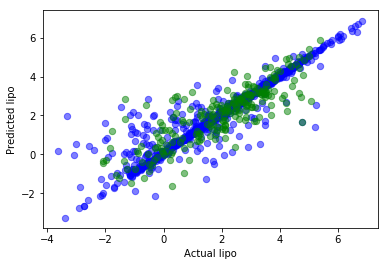

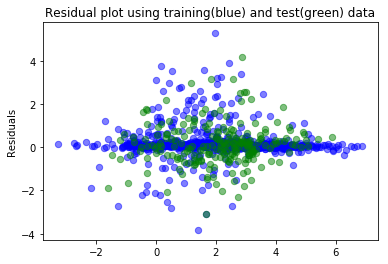

In [8]:
test_model(model,"Neural Network", in_data)